# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=123)

In [12]:
app_train['DAYS_BIRTH_YEAR'] = round(app_train['DAYS_BIRTH']/365)
app_train['DAYS_BIRTH_YEAR']


0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH_YEAR, Length: 307511, dtype: float64

In [13]:
bins = np.linspace(0,100,11)
app_train['DAYS_BIRTH_YEAR_DISCRET'] = pd.cut(app_train['DAYS_BIRTH_YEAR'], bins)
app_train.DAYS_BIRTH_YEAR_DISCRET.describe()

count           307511
unique               5
top       (30.0, 40.0]
freq             82770
Name: DAYS_BIRTH_YEAR_DISCRET, dtype: object

In [14]:
app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts()

(30.0, 40.0]     82770
(40.0, 50.0]     75509
(50.0, 60.0]     67955
(20.0, 30.0]     48869
(60.0, 70.0]     32408
(90.0, 100.0]        0
(80.0, 90.0]         0
(70.0, 80.0]         0
(10.0, 20.0]         0
(0.0, 10.0]          0
Name: DAYS_BIRTH_YEAR_DISCRET, dtype: int64

In [16]:
a = list(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().values)
a

[0, 0, 48869, 82770, 75509, 67955, 32408, 0, 0, 0]

In [17]:
b = list(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().index)
b

[Interval(0.0, 10.0, closed='right'),
 Interval(10.0, 20.0, closed='right'),
 Interval(20.0, 30.0, closed='right'),
 Interval(30.0, 40.0, closed='right'),
 Interval(40.0, 50.0, closed='right'),
 Interval(50.0, 60.0, closed='right'),
 Interval(60.0, 70.0, closed='right'),
 Interval(70.0, 80.0, closed='right'),
 Interval(80.0, 90.0, closed='right'),
 Interval(90.0, 100.0, closed='right')]

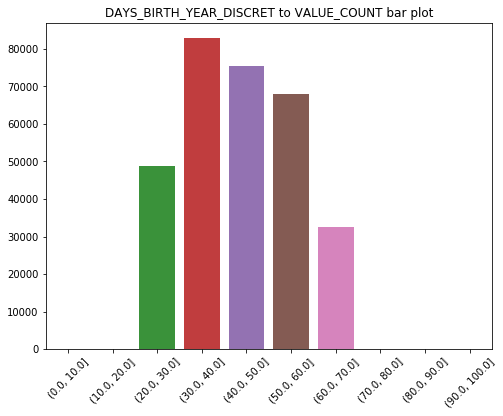

In [18]:
import seaborn as sns # 另一個繪圖-樣式套件
year_group_sorted = list(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().index)

plt.figure(figsize=(8,6))
sns.barplot(b,a)
plt.title('DAYS_BIRTH_YEAR_DISCRET to VALUE_COUNT bar plot')
plt.xticks(rotation=45)
plt.show()

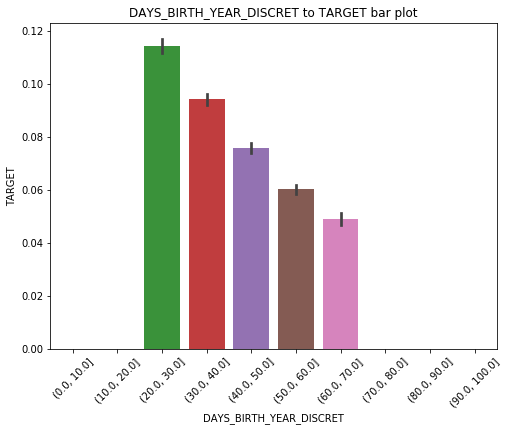

In [21]:
import seaborn as sns # 另一個繪圖-樣式套件

plt.figure(figsize=(8,6))
sns.barplot(app_train['DAYS_BIRTH_YEAR_DISCRET'],app_train['TARGET'])
plt.title('DAYS_BIRTH_YEAR_DISCRET to TARGET bar plot')
plt.xticks(rotation=45)
plt.show()